In [106]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("loan.csv", low_memory=False)
df.shape


(39717, 111)

In [107]:
#code to find count of columns having all null values
print(len(df.columns))
print(df.isnull().sum())

111
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [108]:
# new DF by removing all colmns having all null values.
df_remove_all_null_col =df.dropna(axis=1,how='all')
#df_remove_all_null_col.info()
df=df_remove_all_null_col
#df.info()

In [109]:
# summing up the missing values (column-wise)
Null_Percent = round(100*(df.isnull().sum()/len(df.index)), 2)
print(Null_Percent)
df.shape

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

(39717, 57)

In [110]:

# Converting DataFrame of Issue date is named 'df' and the date column is 'Date'
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d'].describe()



count                            39717
mean     2010-11-03 23:26:45.166553344
min                2007-06-01 00:00:00
25%                2010-05-01 00:00:00
50%                2011-02-01 00:00:00
75%                2011-08-01 00:00:00
max                2011-12-01 00:00:00
Name: issue_d, dtype: object

In [111]:
#Removing columns greater than 60% NaN
df=df.drop("next_pymnt_d",axis=1)
df=df.drop("mths_since_last_delinq",axis=1)
df=df.drop("mths_since_last_record",axis=1)
Null_Percent = round(100*(df.isnull().sum()/len(df.index)), 2)
#print(Null_Percent)
#df['next_pymnt_d'].info() mths_since_last_record
df.shape

(39717, 54)

In [112]:
#drop description as purpose and title is alredy provided
df=df.drop("desc",axis=1)
Null_Percent = round(100*(df.isnull().sum()/len(df.index)), 2)
print(Null_Percent)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [113]:
#drop employee Title as input does not seem correct.
df=df.drop("emp_title",axis=1)

In [114]:
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [115]:
#Check the number of null values in the columns
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [116]:
df1 = df[~df.emp_length.isnull()]

Null_Percent = round(100*(df1.isnull().sum()/len(df1.index)), 2)
Null_Percent 
#Drop the rows having null values in the emp_length field

#Check the shape of the dataframe
df1.shape

(38642, 52)

In [117]:

#Drop the rows having null values in the pub_rec_bankruptcies field
df1 = df1[~df1['pub_rec_bankruptcies'].isnull()]
df1 = df1[~df1['revol_util'].isnull()]
df1 = df1[~df1['last_pymnt_d'].isnull()]
df1= df1[~df1['collections_12_mths_ex_med'].isnull()]
df1= df1[~df1['tax_liens'].isnull()]
#Check the shape of the dataframe
df1.shape

(37834, 52)

In [118]:
#Null_Percent = round(100*(df1.isnull().sum()/len(df1.index)), 2)
#print(Null_Percent)#Drop the rows having null values in the Rating field

df1.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc 

In [119]:
df1= df1[~df1['last_credit_pull_d'].isnull()]
df1= df1[~df1['title'].isnull()]
df1.shape
df1.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37823 entries, 0 to 39623
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37823 non-null  int64         
 1   member_id                   37823 non-null  int64         
 2   loan_amnt                   37823 non-null  int64         
 3   funded_amnt                 37823 non-null  int64         
 4   funded_amnt_inv             37823 non-null  float64       
 5   term                        37823 non-null  object        
 6   int_rate                    37823 non-null  object        
 7   installment                 37823 non-null  float64       
 8   grade                       37823 non-null  object        
 9   sub_grade                   37823 non-null  object        
 10  emp_length                  37823 non-null  object        
 11  home_ownership              37823 non-null  object        


In [121]:
df1['int_rate'].describe()

count      37823
unique       336
top       10.99%
freq         932
Name: int_rate, dtype: object

In [122]:
# Converting DataFrame of  date  inputs to Date dtype
df1['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df1['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

df1['issue_month'] = pd.to_datetime(df1['issue_d']).dt.month
df1['issue_year'] = pd.to_datetime(df1['issue_d']).dt.year

df1['last_py_month'] = pd.to_datetime(df1['last_pymnt_d']).dt.month
df1['last_py_year'] = pd.to_datetime(df1['last_pymnt_d']).dt.year

df1['last_cr_pull_month'] = pd.to_datetime(df1['last_credit_pull_d']).dt.month
df1['last_cr_pull_year'] = pd.to_datetime(df1['last_credit_pull_d']).dt.year

df1['earliest_cr_line_month'] = pd.to_datetime(df1['earliest_cr_line']).dt.month
df1['earliest_cr_line_year'] = pd.to_datetime(df1['earliest_cr_line']).dt.year

#df1.info()



In [123]:

df1['int_rate'] = df1['int_rate'].astype('string')

df1['int_rate'] = df1['int_rate'].str.replace('%','').astype('float')


df1['revol_util'] = df1['revol_util'].astype('string')

df1['revol_util'] = df1['revol_util'].str.replace('%','').astype('float')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37823 entries, 0 to 39623
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37823 non-null  int64         
 1   member_id                   37823 non-null  int64         
 2   loan_amnt                   37823 non-null  int64         
 3   funded_amnt                 37823 non-null  int64         
 4   funded_amnt_inv             37823 non-null  float64       
 5   term                        37823 non-null  object        
 6   int_rate                    37823 non-null  float64       
 7   installment                 37823 non-null  float64       
 8   grade                       37823 non-null  object        
 9   sub_grade                   37823 non-null  object        
 10  emp_length                  37823 non-null  object        
 11  home_ownership              37823 non-null  object        


In [124]:
"CATEGORISE"

'Derived METRICS'


'Derived METRICS'

In [125]:

bins = [-1,0, 5, 10, 15, 20, 25, 30]
labels = ['0','0-5', '5-10', '10-15', '15-20','20-25','25-30']
# Convert 'int_rate' column to string
#df1['int_rate_str'] = df1['int_rate'].astype(str)
# Create the 'dti_Bucket' column
df1['dti_Bucket'] = pd.cut(df1['dti'], bins=bins, labels=labels)
#df1['dti_Bucket'].value_counts()
df1['dti_Bucket'].describe()
df1['dti_Bucket'].isnull().sum()

#df1.head()

0

In [126]:
int_bins = [-1,0, 5, 10, 15, 20, 25,30,35]
int_labels = ['0','0-5','5-10', '10-15', '15-20','20-25','25-30','30-35']
# Create the 'dti_Bucket' column
df1['interest_Bucket'] = pd.cut(df1['dti'], bins=int_bins, labels=int_labels)
df1['interest_Bucket'].value_counts()
#df1['interest_Bucket'].describe()
#df1.head()
df1['interest_Bucket'].isnull().sum()

0

In [127]:
'UNIVARIATE for Charged OFF accounts'

'UNIVARIATE for Charged OFF accounts'

In [128]:
df_writeoff = df1[df1['loan_status'] == 'Charged Off']
df_fullypaid = df1[df1['loan_status'] == 'Fully Paid']

In [129]:
df_writeoff.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_month', 'issue_year',
       'last_py_month', 'last_py_year', 'last_cr_pull_month',
    

In [130]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#plt.hist(df_writeoff.int_rate)
#plt.show()
#df_fullypaid.int_rate.describe()
df_writeoff.int_rate.describe()
#sns.distplot(df_writeoff.int_rate, bins=25)
#sns.boxplot(y=df_writeoff['issue_year'],x=df_writeoff['purpose'])
#sns.boxplot(x=df1['loan_status'] ,y=df1['total_rec_int'])
#df_writeoff['grade'].value_counts().plot.pie()
#plt.show()

count    5201.000000
mean       13.925574
std         3.657039
min         5.420000
25%        11.490000
50%        13.790000
75%        16.450000
max        24.400000
Name: int_rate, dtype: float64

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

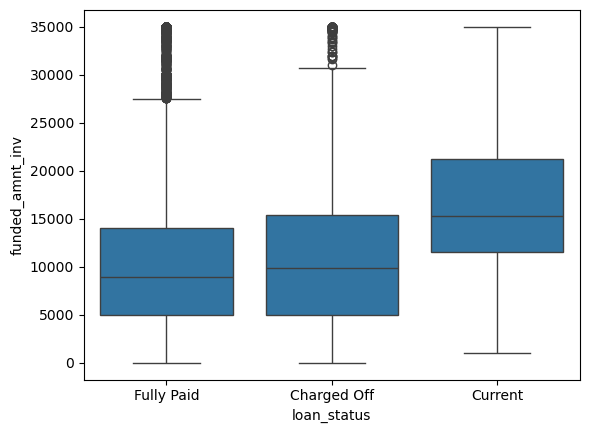

In [131]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

sns.boxplot(x=df1['loan_status'], y=df1['funded_amnt_inv'])

(37823, 62)

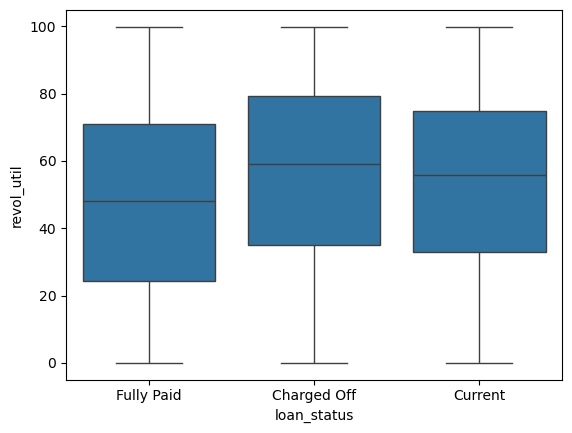

In [132]:
sns.boxplot(x=df1['loan_status'] ,y=df1['revol_util'])
df1.shape


(37823, 62)

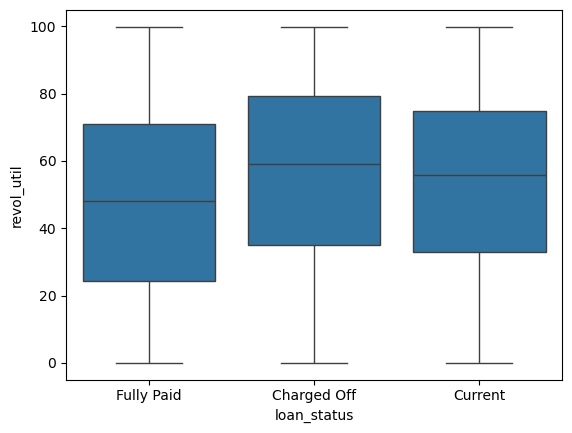

In [133]:
sns.boxplot(x=df1['loan_status'] ,y=df1['revol_util'])
df1.shape

In [134]:
df3=df1[(df1['grade'] == 'G') & (df1['loan_status'] =='Fully Paid')]
df3.shape

(196, 62)

<Axes: xlabel='grade', ylabel='last_py_year'>

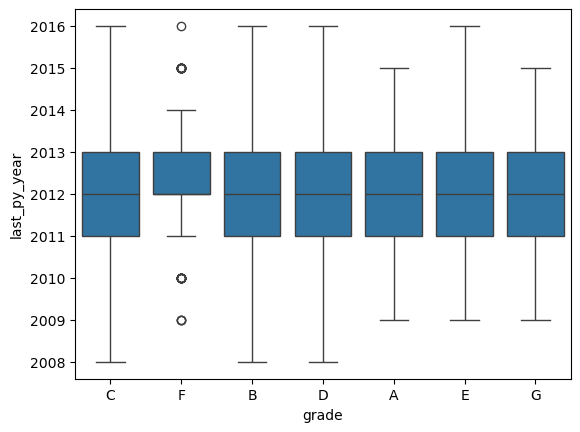

In [135]:
sns.boxplot(x=df_writeoff['grade'] ,y=df_writeoff['last_py_year'])

<Axes: xlabel='grade', ylabel='int_rate'>

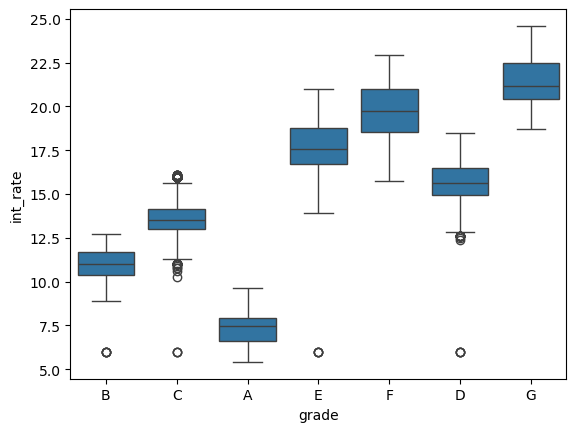

In [136]:
sns.boxplot(y=df1['int_rate'] ,x=df1['grade'])

<Axes: xlabel='grade', ylabel='int_rate'>

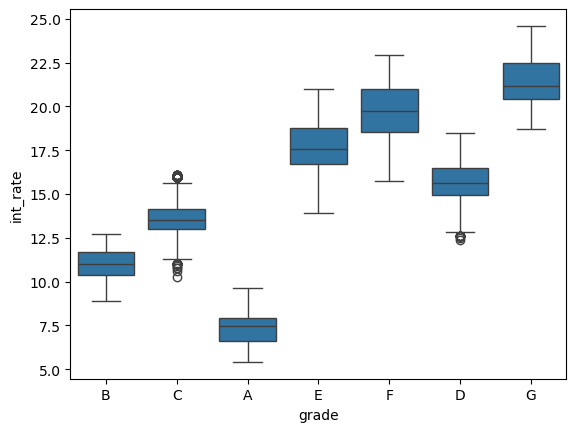

In [137]:
df1=df1[~((df1['grade'].isin(['B','C','D','E','F','G'])) & (df1['int_rate'] <7.5))]
sns.boxplot(x=df1['grade'] ,y=df1['int_rate'])


<Axes: xlabel='revol_util', ylabel='dti'>

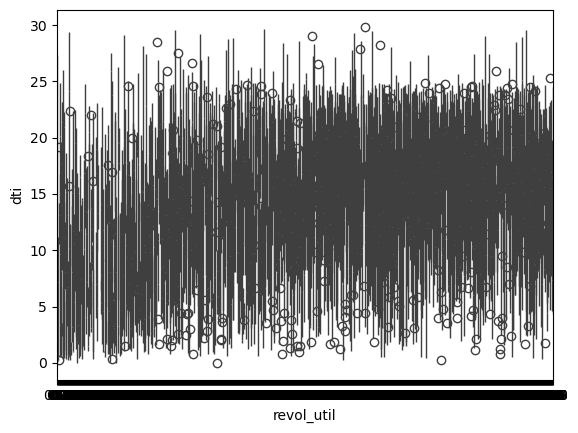

In [138]:
sns.boxplot(x=df_writeoff['revol_util'] ,y=df_writeoff['dti'])

<Axes: xlabel='loan_status', ylabel='dti'>

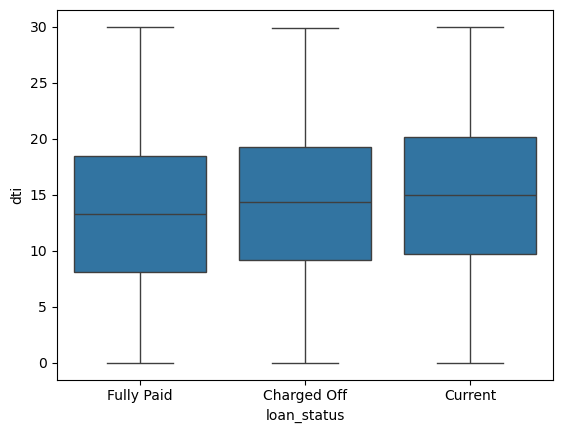

In [139]:
sns.boxplot(x=df1['loan_status'] ,y=df1['dti'])

<Axes: xlabel='loan_status', ylabel='revol_util'>

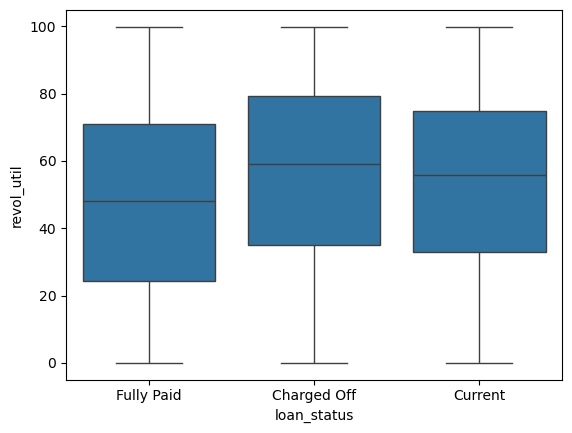

In [140]:

sns.boxplot(x=df1['loan_status'] ,y=df1['revol_util'])

<Axes: xlabel='purpose', ylabel='int_rate'>

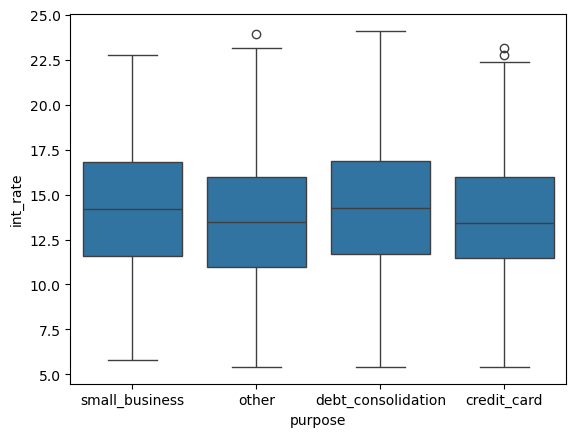

In [141]:
top5cat =  df_writeoff['purpose'].value_counts().head(4).index


top5 =  df_writeoff[ df_writeoff['purpose'].isin(top5cat)]
sns.boxplot(x=top5['purpose'], y=top5['int_rate'])


<Axes: xlabel='delinq_2yrs', ylabel='Count'>

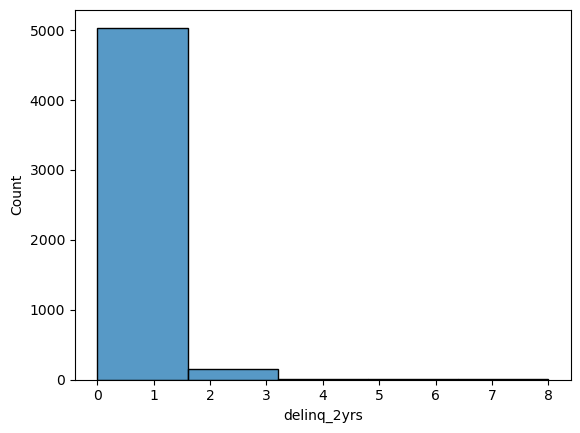

In [142]:
sns.histplot(df_writeoff.delinq_2yrs, bins=5)
#sns.boxplot(x=df1['loan_status'] ,y=df1['addr_state'])

In [143]:
per75_heat =pd.pivot_table(data=df1, index='loan_status', columns='grade', values='dti', aggfunc=np.mean)

#per75_dti =pd.pivot_table(data= df1, index ='loan_status', columns = 'grade', values = 'dti', aggfunc = np.min())


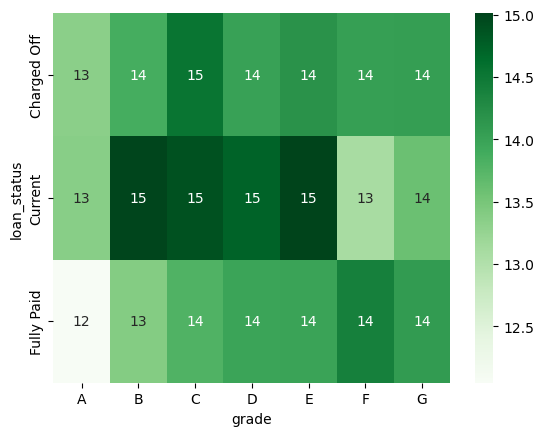

In [144]:
sns.heatmap(per75_heat, cmap='Greens' , annot=True)
plt.show()

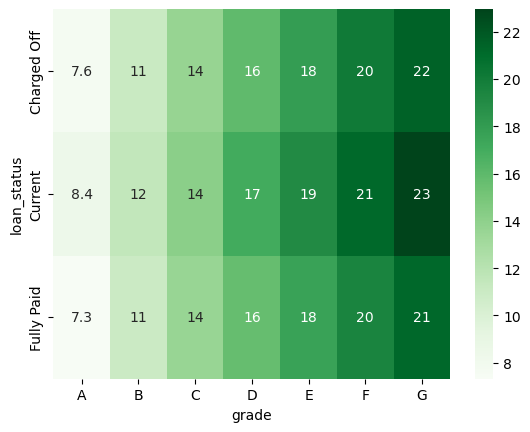

In [145]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df1' with the required data
per75_heat_mean = pd.pivot_table(data=df1, index='loan_status', columns='grade', values='int_rate', aggfunc=np.mean)

sns.heatmap(per75_heat_mean, cmap='Greens' , annot=True)
plt.show()

In [146]:
IQR = np.percentile(df1.dti,75)-np.percentile(df1.dti,25)
LowerF =  np.percentile(df1.dti,25) - (1.5*IQR)
print(LowerF)

-7.27


In [147]:
monthly = pd.pivot_table(data= df1, index ='verification_status', columns = 'loan_status', values = 'dti')

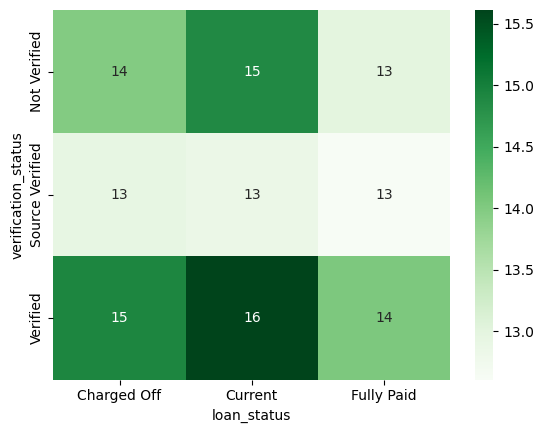

In [148]:
sns.heatmap(monthly, cmap='Greens' , annot=True)
plt.show()

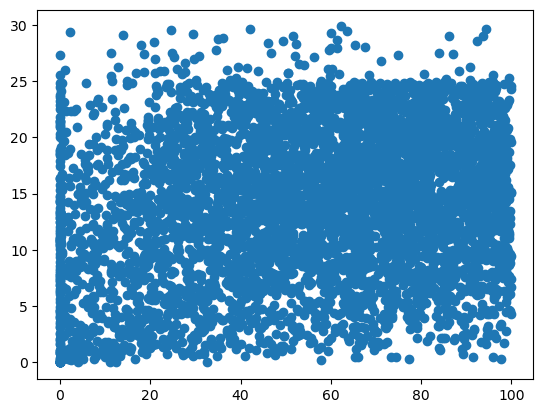

In [149]:

Revol_dti_rel = pd.pivot_table(data= df1, index ='grade', columns = 'loan_status', values = 'revol_util')

#sns.heatmap(monthly, cmap='Greens' , annot=True)
#plt.show()

plt.scatter(df_writeoff.revol_util, df_writeoff.dti)

<Axes: xlabel='issue_year'>

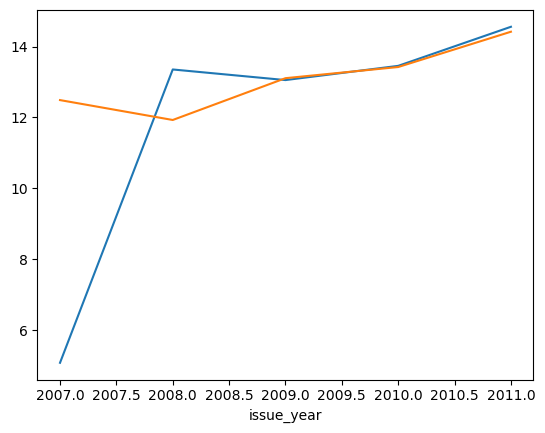

In [150]:
df_writeoff.groupby('issue_year')['dti'].mean().plot()
df_writeoff.groupby('issue_year')['int_rate'].mean().plot()

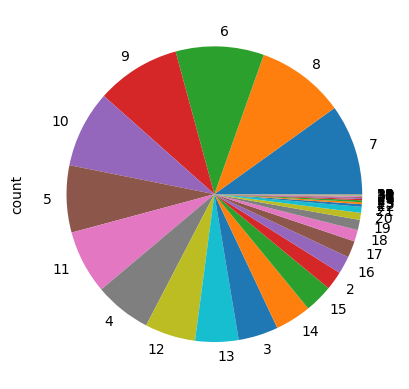

In [151]:
#Plot a pie chart
df_writeoff['open_acc'].value_counts().plot.pie()
plt.show()

In [152]:
df1.int_rate.isnull().sum()

0

In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37807 entries, 0 to 39623
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37807 non-null  int64         
 1   member_id                   37807 non-null  int64         
 2   loan_amnt                   37807 non-null  int64         
 3   funded_amnt                 37807 non-null  int64         
 4   funded_amnt_inv             37807 non-null  float64       
 5   term                        37807 non-null  object        
 6   int_rate                    37807 non-null  float64       
 7   installment                 37807 non-null  float64       
 8   grade                       37807 non-null  object        
 9   sub_grade                   37807 non-null  object        
 10  emp_length                  37807 non-null  object        
 11  home_ownership              37807 non-null  object        


In [154]:
# Create a new column loan_status_charged_off
df1['loan_status_charged_off'] = (df1['loan_status'] == 'Charged Off').astype(int)
df1.dtypes

id                            int64
member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
                             ...   
earliest_cr_line_month        int32
earliest_cr_line_year         int32
dti_Bucket                 category
interest_Bucket            category
loan_status_charged_off       int32
Length: 63, dtype: object

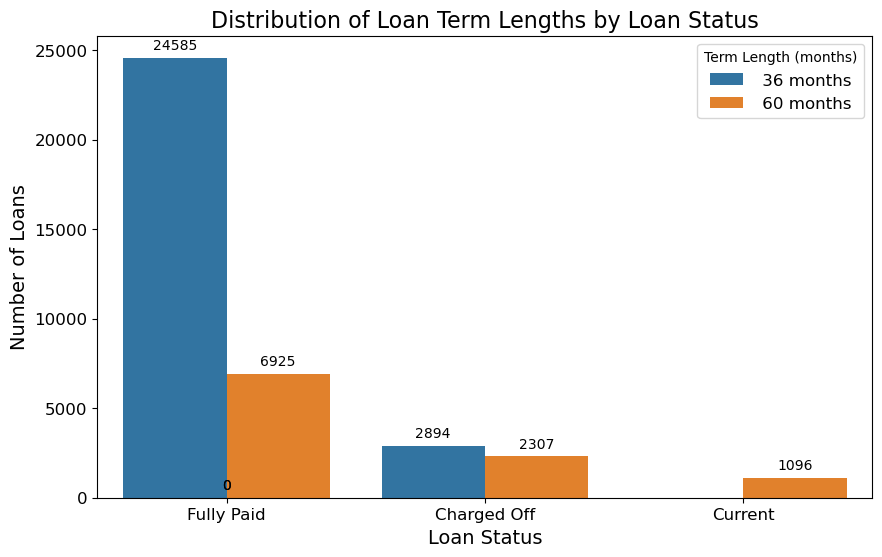

In [166]:

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_status', hue='term', data=df1, palette=['#1f77b4', '#ff7f0e'])

# Add titles and labels
plt.title('Distribution of Loan Term Lengths by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

# Add a legend
plt.legend(title='Term Length (months)', fontsize=12)

# Show the plot
plt.show()


# Analysis of Loan Term Lengths and Loan Status
In the above plot, we can see that the dataset contains customers with two types of loan terms: **36 months and 60 months**. More than 30,000 customers have fully paid off their loans, with around 25,000 of them taking loans for a term of 36 months, and only around 7,000 taking loans for a term of 60 months. This indicates that a majority of customers opted for the 36-month loan category.. 

However, it's interesting to note that the number of customers who were charged off is roughly the same for both terms, at around **2,500 each**. This suggests a higher percentage of customers with **60-month loans** are unable to repay their loans compared to those with **36-month loans**.


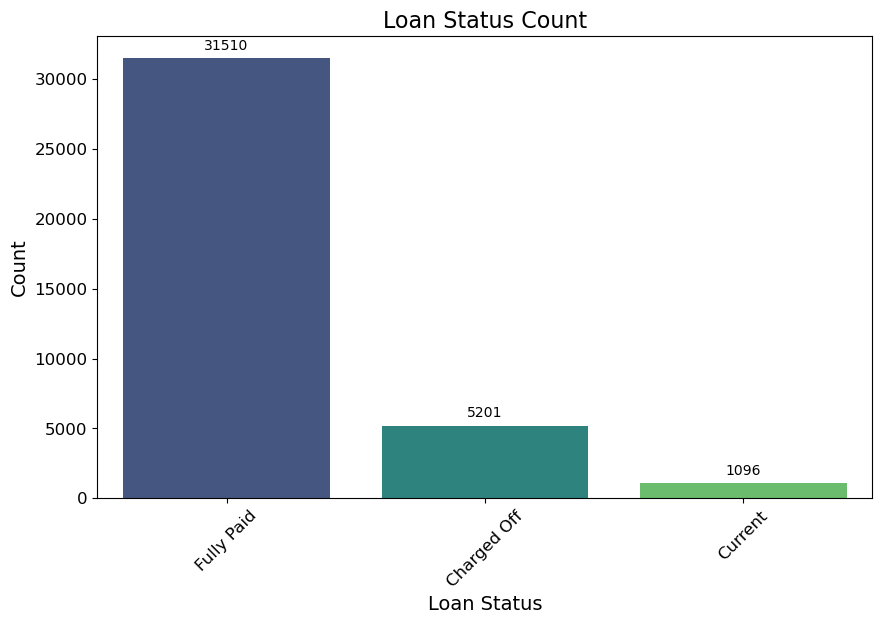

In [167]:
# Create a bar plot for the loan status count
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_status', data=df1, palette='viridis')

# Add titles and labels
plt.title('Loan Status Count', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

# Show the plot
plt.show()

# Loan Status of Members for each category(Fully Paid, Charged Off and Current)
**31510** members have paid the loan in full, **5201** members have been Charged off, **1096** members are currently still paying

In [173]:
df_writeoff.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_month', 'issue_year',
       'last_py_month', 'last_py_year', 'last_cr_pull_month',
    

In [184]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the df_writeoff DataFrame
df_writeoff.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,last_py_month,last_py_year,last_cr_pull_month,last_cr_pull_year,earliest_cr_line_month,earliest_cr_line_year,dti_Bucket,interest_Bucket
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,4,2013,9,2013,4,1999,0-5,0-5
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,2004-04-01,2,11,0,5210,32.6,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,2012-04-01,152.39,2012-08-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,4,2012,8,2012,4,2004,5-10,5-10
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,2004-09-01,0,2,0,9279,36.5,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,11,2012,3,2013,9,2004,15-20,15-20
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,2004-04-01,1,4,0,10452,91.7,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,2012-07-01,305.38,2012-11-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,7,2012,11,2012,4,2004,10-15,10-15
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other Loan,951xx,CA,7.06,0,1991-05-01,2,14,0,11997,55.5,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,2013-10-01,325.74,2014-03-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,10,2013,3,2014,5,1991,5-10,5-10


# Ordered Categorical Variable Analysis

<Axes: xlabel='grade'>

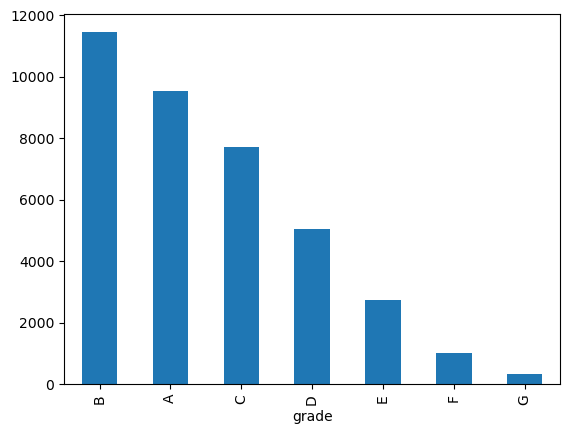

In [197]:
# Create a bar plot for write_off loans with different 'Grades'
df1['grade'].value_counts().plot.bar()

## Majority of the Loan applicants fall under the category of Grade B

<Axes: xlabel='term'>

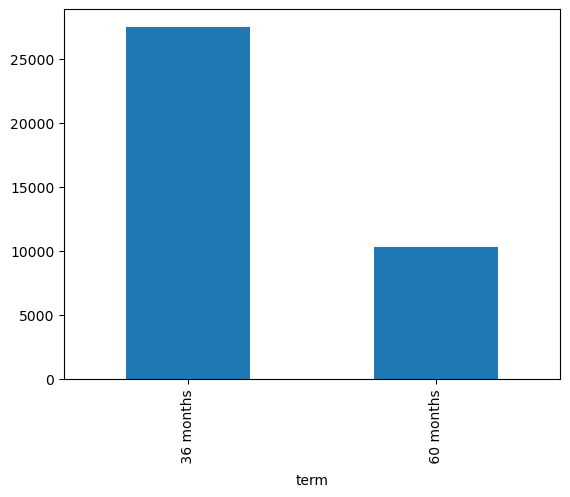

In [199]:
# Create a bar plot to check loans borrowed for 24 months and 36 months
df1['term'].value_counts().plot.bar()

### Majority of the loan applications are for 36 months

<Axes: xlabel='emp_length'>

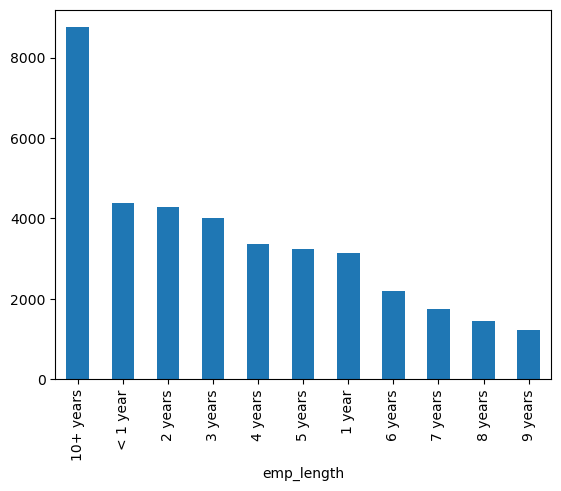

In [201]:
# Check employee length
df1['emp_length'].value_counts().plot.bar()

### Majority of the loan applications are having more than 10 years of experience

<Axes: xlabel='pub_rec_bankruptcies'>

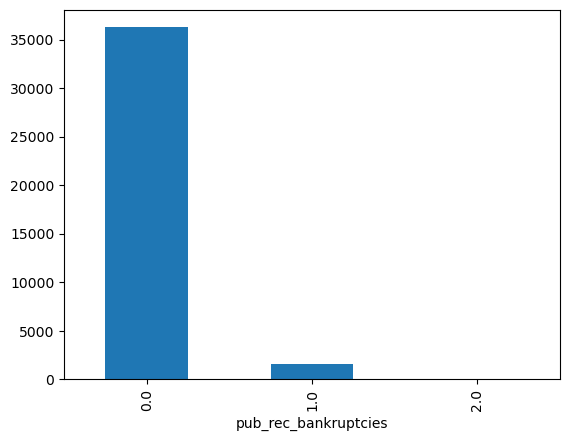

In [203]:
# To Check public bankruptcies
df1['pub_rec_bankruptcies'].value_counts().plot.bar()

### Majority of the loan applications are not having public record of bankruptcies

# Derived Variable Analysis

<Axes: xlabel='issue_year'>

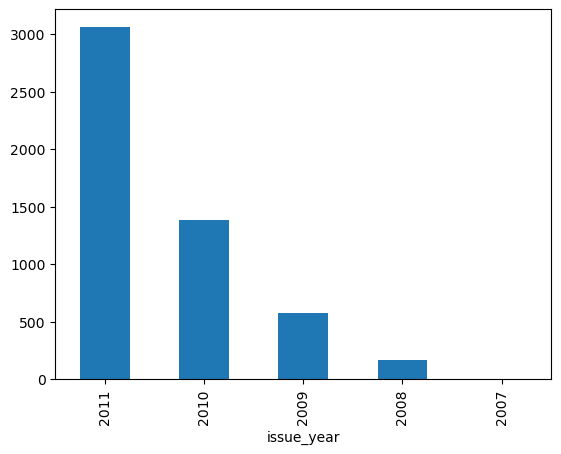

In [209]:
# Year Of Issue for written off loans
df_writeoff['issue_year'].value_counts().plot.bar()

### Every year risk is increasing as more write off loans are seen every year

<Axes: xlabel='issue_month'>

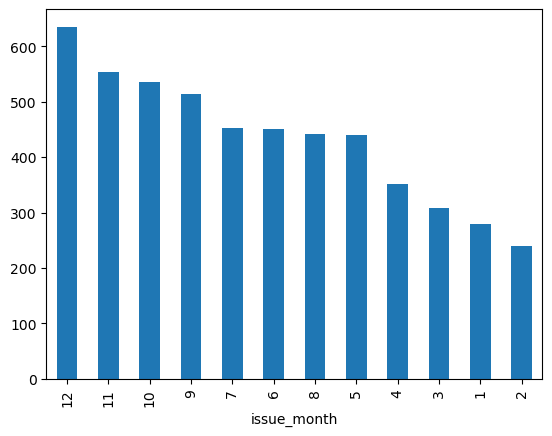

In [210]:
# Month of Issue for written off loans
df_writeoff['issue_month'].value_counts().plot.bar()

### Loan approval team must be cautious during the months of October, November and specially December where a lot of borrowers need loans and will be a risk to the company

In [ ]:
output_csv_path = "loan_cleaned_data.csv"
df1.to_csv(output_csv_path, index=False)